## 1. Consider two classes described by the covariance matrices below (assume zero mean) 
                                            a.∑=[1 0]      b.∑=[1 0.9]
                                                [0 1]          [0.9 1]

### a) For each matrix generate 1000 data samples and plot them on separate figures.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

a_cov = [[1.0, 0.0], [0.0, 1.0]]
b_cov = [[1.0, 0.9], [0.9, 1.0]]
mean = [0, 0]

data = np.random.multivariate_normal(mean, a_cov, 1000)
plt.plot(data[:,0],data[:,1],'.')
plt.show()

data2 = np.random.multivariate_normal(mean, b_cov, 1000)
plt.plot(data2[:,0],data2[:,1],'.')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### b) For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation.
Plot each contour on the respective plots from part (a).

In [2]:
w1,v1=np.linalg.eig(a_cov)
print(v1)


#w,v=np.linalg.eig(b_cov)
#print(w)
#print(v)

print(np.var(v1))

print(" ------ ")

print(np.matmul(a_cov,v1))
print(np.dot(w1[1],v1))


[[1. 0.]
 [0. 1.]]
0.25
 ------ 
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


### c) Calculate sample covariance matrices for each class using the data generated in part(a). Do not use a Python/Matlab function for computing the covariance.

In [3]:
# use your own functions
print("For matrix a:", np.cov(data[:,0],data[:,1]))
print("For matrix b",np.cov(data2[:,0],data2[:,1]))

For matrix a: [[0.91750371 0.02484638]
 [0.02484638 1.06622883]]
For matrix b [[0.95222081 0.85821763]
 [0.85821763 0.95347828]]


### d) Compare the given covariance matrix for each class with the corresponding sample covariance matrix generated in (b).

In [4]:
tmp = np.cov(data[:,0],data[:,1])
mse = ((a_cov - tmp)**2).mean(axis=None)
print(mse)

0.0031066455096758305


## 2. Consider a 2D problem with 3 classes where each class is described by the following priors, mean vectors, and covariance matrices.

                                            P(C1) = 0.2
                                            μ1 =[3 2]𝑇
                                            ∑1=[1 −1] 
                                               [−1 2]

                                            P(C2) = 0.3
                                            μ2 =[5 4]𝑇
                                            ∑2=[1 −1] 
                                                [−1 7]

                                            P(C3) = 0.5
                                            μ3 =[2 5]𝑇
                                            ∑3=[0.5 0.5] 
                                                [0.5 3]

### a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.


In [5]:
print("dd")
# import numpy as np

# class MLClassifier ( object ):

#     def __init__ ( self, x_train ):
#         """Takes in the training dataset, a n_features * n_samples
#         (e.g. wavebands * samples) array. Pre calculates a lot of terms
#         """
#         self.x_train = x_train
#         self.n_samples = x_train.shape[1]
#         self.n_features = x_train.shape[0]
#         cov_m = np.cov ( x_train )
#         self.i_cov_m = np.linalg.inv ( cov_m )
#         self.det_cov = np.linalg.det ( cov_m )
#         self.mu = x_train.mean ( axis=1 )
#         self.constant_term = -0.5*np.log( self.det_cov ) - \
#                 self.n_features*0.5*np.log(2.*np.pi)

#     def classify ( self, x_test, threshold = None ):
#         """Classifies (ie gives the probability of belonging to a 
#         class defined by the `__init__` training set) for a number
#         of test data vectors. These vectors are n_features*n_samples.
#         If `threshold` is specified, it selects samples with a probability
#         larger or equal to it's value
#         """
#         s = x_test.T - self.mu
#         log_prob =  -  0.5*  \
#             (np.dot(s, self.i_cov_m) *  s).sum(1) 
#         prob = np.exp ( log_prob )

#         if threshold is not None:
#             return np.where ( prob >= threshold, \
#                 True, False )
#         else:
#             return prob


# if __name__ == "__main__":
#     # Create two random datasets with a known covariance and mean
#     train = np.random.multivariate_normal([0.8, 0.4], np.diag(np.array([0.2, 0.9])), 5000).T
#     test = np.random.multivariate_normal([0.8, 0.4], np.diag(np.array([0.2, 0.9])), 10000).T
#     # Train using the training set
#     clf = MLClassifier ( train )
#     # Classify with a threhsold of 30%
#     probs = clf.classify ( test,threshold=0.3 )
#     plt.plot ( test[0,probs], test[1,probs], 'r+')
#     # Classify with a treshold of 70%
#     probs = clf.classify ( test,threshold=0.7 )
#     plt.plot ( test[0, probs], test[1,probs], 'k+')

dd


-2.588018294692748


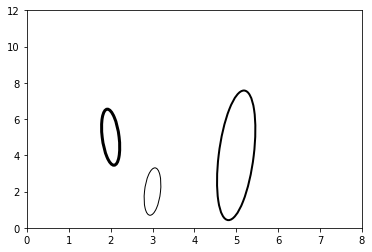

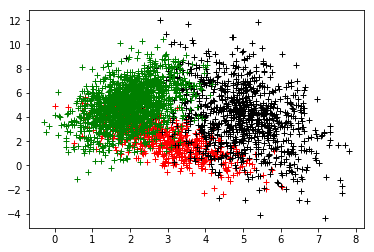

In [89]:
from matplotlib import patches

p_1 = 0.2
mean_1 = [3, 2]
cov_1=[[1,-1],[-1,2]]

p_2 = 0.3
mean_2 = [5, 4]
cov_2=[[1,-1],[-1,7]]

p_3 = 0.5
mean_3 = [2, 5]
cov_3=[[0.5,0.5],[0.5,3]]



fig,ax = plt.subplots(1)
ax.set_xlim([0, 8])
ax.set_ylim([0, 12])



w1,vec1=np.linalg.eig(cov_1)
vx, vy = vec1[:,0][0], vec1[:,0][1]
theta = np.arctan2(vy, vx)

print(theta)

e1 = patches.Ellipse((mean_1[0], mean_1[1]), w1[0], w1[1], angle=theta, linewidth=1, fill=False, zorder=1)

w2,v2=np.linalg.eig(cov_2)
vx, vy = v2[:,0][0], v2[:,0][1]
theta = np.arctan2(vy, vx)
e2 = patches.Ellipse((mean_2[0], mean_2[1]), w2[0], w2[1], angle=theta, linewidth=2, fill=False, zorder=1)

w3,v3=np.linalg.eig(cov_3)
vx, vy = v3[:,0][0], v3[:,0][1]
theta = np.arctan2(vy, vx)
e3 = patches.Ellipse((mean_3[0], mean_3[1]), w3[0], w3[1], angle=theta, linewidth=3, fill=False, zorder=1)


ax.add_patch(e1)
ax.add_patch(e2)
ax.add_patch(e3)
plt.show()


data_1 = np.random.multivariate_normal(mean_1, cov_1, int(p_1*3000))
plt.plot(data_1[:,0],data_1[:,1],'r+')

data_2 = np.random.multivariate_normal(mean_2, cov_2, int(p_2*3000))
plt.plot(data_2[:,0],data_2[:,1],'k+')

data_3 = np.random.multivariate_normal(mean_3, cov_3, int(p_3*3000))
plt.plot(data_3[:,0],data_3[:,1],'g+')


plt.show()

### 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. Use only the training set to perform this part.

In [31]:
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size* image_size)

a). Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the number of features selected by the PCA algorithm. Note that you must compute the PCA computation method by yourself. You may use preexisting functions for Eigen computation.

In [32]:
def my_pca(data, dimentions):
    mean = np.mean(data, axis = 0)
    mean_sub = data - mean
    cov = np.cov(mean_sub, rowvar = 0)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    largest_eigen_values_index = i[:dimentions]
    eigen_vectors = eigen_vectors[:,largest_eigen_values_index]
    
    P = np.dot(np.transpose(eigen_vectors), np.transpose(mean_sub))
    return P



print(np.array(data).shape)
tmp=my_pca(np.array(data), 5)
print(np.array(tmp).shape)


(60000, 784)
(5, 60000)


b) Propose a suitable d using proportion of variance (POV) =95%.

In [45]:
def get_dimentions_from_pca(data, pov):
    mean = np.mean(data, axis = 0)
    mean_sub = data - mean
    cov = np.cov(mean_sub, rowvar = 0)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    sum_eigen_values = np.sum(eigen_values)
    
    dimentions = 0
    tot = 0.0
    for x in i:
        if tot/sum_eigen_values < pov:
            tot+=eigen_values[x]
            dimentions+=1
        else: 
            break
    
    print(dimentions)
 
    return dimentions

tmp=get_dimentions_from_pca(np.array(data),0.95)

154


## 4. Once again, consider the MNIST dataset. Use the training set as your training data and the test set as your test data.

a) Classify the test data using a kNN classifier. Report the accuracy for k = {1,3,5,11}. Justify and compare the reported accuracies for the different values of k. Do not use kNN implemented function in Python/Matlab and implement it by yourself.

In [8]:
from sklearn.model_selection import train_test_split

# Training and testing split,
# 75% for training and 25% for testing
#(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
#(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)


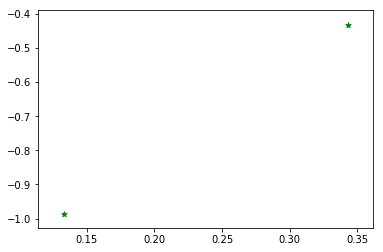

In [9]:
import matplotlib.pyplot as plt

cov = [[1,0],[0,1]]
cov2 = [[1,0.9],[0.9,1]]
mean = [0,0]

data = np.random.multivariate_normal(mean=mean, cov=cov,size =1000)
data2 = np.random.multivariate_normal(mean=mean, cov=cov2,size =1000)

#print(data)
#print(data2)


plt.scatter(data[0], data[1], label= "stars", color= "green",  
            marker= "*", s=30) 


#f1 = plt.figure
#plt.plot(data[0],data[1])
plt.show()
